<a href="https://colab.research.google.com/github/AdindaRahajengSilviaPranesti/MachineLearning_Quiz/blob/main/Group_2_Machine_Learning_Quiz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group 2
- Adinda Rahajeng Silvia Pranesti/02/2141720158
- Faizal Leviansyah/05/21u41720246
- Khafilla Akbar Syahputra/11/2141720152
- Muhammad Adhika Isa Nugraha/13/2141720267
- Muhammad Fahmi Huwaidi/16/2141720153


# Case Study - Handwritten Classification Using MNIST Data

## General Description
You are requested to perform classification using the Naive Bayes and SVM algorithms to recognize handwritten digits from the MNIST dataset.

## About MNIST Dataset

The MNIST (Modified National Institute of Standards and Technology) dataset is a collection of grayscale images sized 28x28 pixels, containing handwritten digits ranging from 0 to 9. The dataset comprises a total of 70,000 handwritten images.

## Tasks

1. Ensure the number of data points for each digit label (0-9). Is there any data imbalance in the MNIST dataset being used? Explain your group's answer and provide evidence!

2. Display the first 15 images from the MNIST dataset along with their labels. You can refer to Job Sheet 03 for guidance.

3. Perform feature extraction on the MNIST data. In this process, you are allowed to:
   - Use the original pixel values of the images as features.
   - Perform other feature extraction methods such as histograms, PCA, or others. You are allowed to explore this process.

4. Create training and testing data using ratios of 70:30, 80:20, and 90:10.

5. Conduct classification using the Naive Bayes and SVM algorithms.
   - You are allowed to tune parameters.
   - You are allowed to explore different types of kernels for SVM.

6. Evaluate the models you have created on both the training and testing data.
   - Use the *accuracy* metric to assess the accuracy on training and testing data.
   - Utilize the *classification_report* function to understand the model's overall performance.
   - Use a confusion matrix to determine the accuracy of labeling.

7. Display the testing data images along with their predicted labels. You can use Job Sheet 03 as a reference.

8. What is the best model you obtained? What is its configuration? What level of accuracy did you achieve? Explain!

Please note that this appears to be a set of instructions for a machine learning project using the MNIST dataset. You would need to follow these steps, perform the necessary coding and analysis, and then provide your findings and results.

#📑  Helper

Here is the code snippet to help you download the MNIST dataset

In [ ]:
# Download MNIST Dataset
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
# Please read MNIST dataset description
# It may help you to understand the dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [ ]:
# Inpsect dataset keys
# It may help you to understand the dataset structure
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
print(mnist.data)

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel7

##📑 1. Ensure the number of data points for each digit label (0-9). Is there any data imbalance in the MNIST dataset being used? Explain your group's answer and provide evidence!

In [2]:
#importing Library
%pip install torch torchvision numpy matplotlib pandas

import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Download the MNIST dataset using torchvision
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
mnist_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 72896234.44it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 4012976.01it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 28740530.75it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 12322463.63it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
# Extracting the data and labels
data = mnist_dataset.data
labels = mnist_dataset.targets

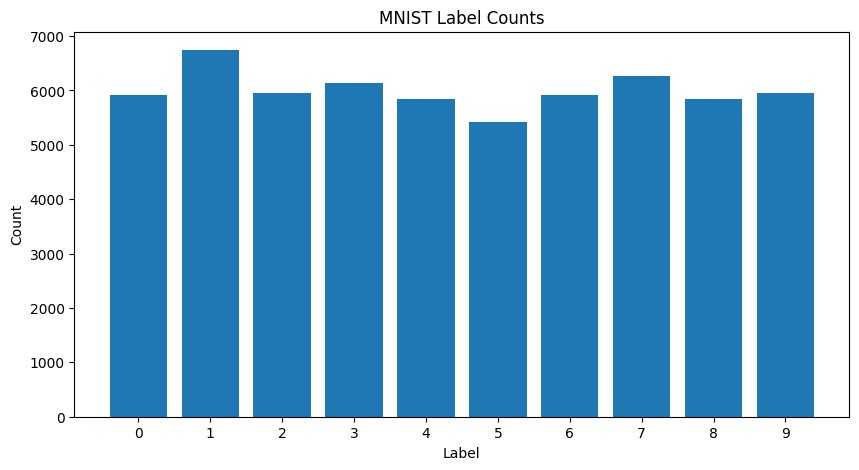

In [ ]:
# 1. Counting the size of each label
label_counts = torch.bincount(labels)

fig, ax = plt.subplots(figsize=(10, 5))

# bar function is to create a chart to visualize the label counts
ax.bar(np.arange(10), label_counts)

ax.set_xticks(np.arange(10))
ax.set_xticklabels([str(i) for i in range(10)])

# Set axis labels and title
ax.set_xlabel('Label')
ax.set_ylabel('Count')
ax.set_title('MNIST Label Counts')

plt.show()

##📑 2. Display the first 15 images from the MNIST dataset along with their labels. You can refer to Job Sheet 03 for guidance.



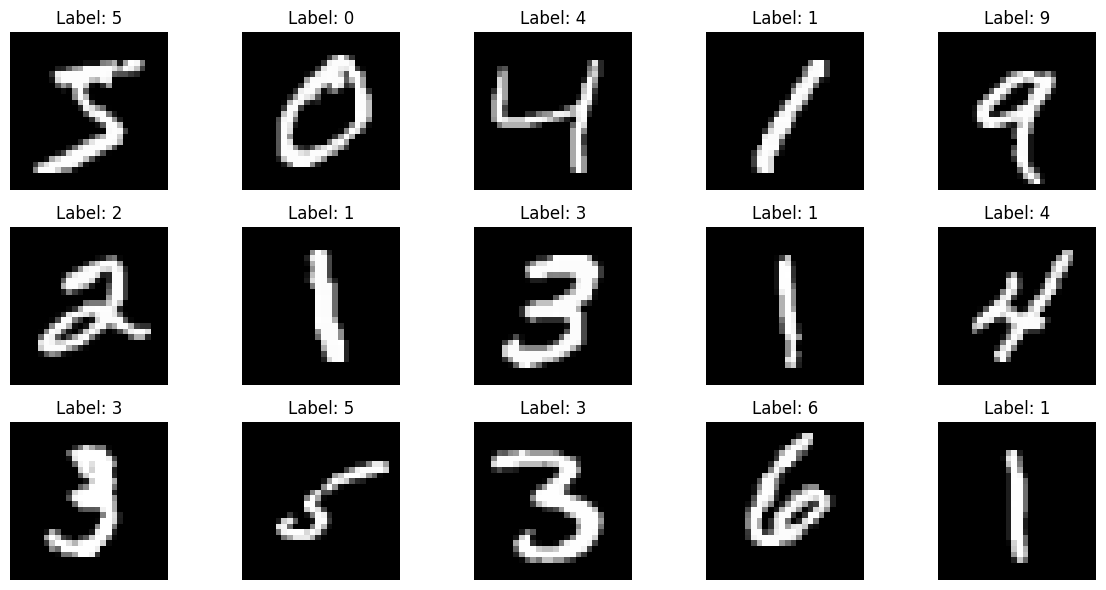

In [5]:
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(data[i], cmap='gray')
    plt.title(f"Label: {labels[i].item()}")
    plt.axis('off')

plt.tight_layout()
plt.show()


##📑 3. Perform feature extraction on the MNIST data. In this process, you are allowed to:
   - Use the original pixel values of the images as features.
   - Perform other feature extraction methods such as histograms, PCA, or others. You are allowed to explore this process.

In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize and reshape the data
data_std = StandardScaler().fit_transform(data.reshape(data.shape[0], -1))

# Perform PCA with the desired number of components (e.g., 50)
n_components = 50
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data_std)


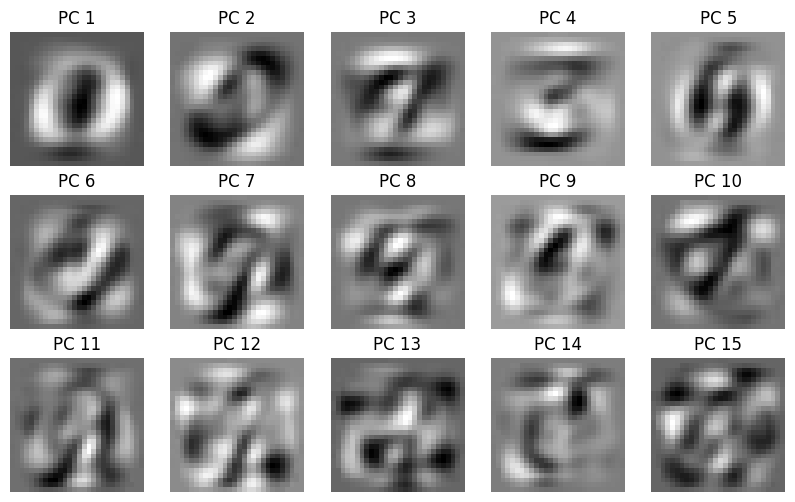

In [31]:
# Visualize the first 15 principal components (eigendigits)
fig, ax = plt.subplots(3, 5, figsize=(10, 6))
for i, axi in enumerate(ax.flat):
    eigendigit = pca.components_[i].reshape(28, 28)
    axi.imshow(eigendigit, cmap='gray')
    axi.set_title(f'PC {i + 1}')
    axi.axis('off')

plt.show()


##📑 4. Create training and testing data using ratios of 70:30, 80:20, and 90:10.



In [8]:
# 4. Split data for testing and training

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data_pca, labels, test_size=0.3)

X1_train, X1_test, y1_train, y1_test = train_test_split(
    data_pca, labels, test_size=0.2)

X2_train, X2_test, y2_train, y2_test = train_test_split(
    data_pca, labels, test_size=0.1)

# Verify the shapes of the training and testing sets
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (42000, 50)
y_train shape: torch.Size([42000])
X_test shape: (18000, 50)
y_test shape: torch.Size([18000])


##📑 5. Conduct classification using the Naive Bayes and SVM algorithms.
   - You are allowed to tune parameters.
   - You are allowed to explore different types of kernels for SVM.


##📑 6. Evaluate the models you have created on both the training and testing data.
   - Use the *accuracy* metric to assess the accuracy on training and testing data.
   - Utilize the *classification_report* function to understand the model's overall performance.
   - Use a confusion matrix to determine the accuracy of labeling.



##📑 7. Display the testing data images along with their predicted labels. You can use Job Sheet 03 as a reference.


# **📋📈A. LINEAR MODEL**

In [12]:
# Number 5, 6, 7 match data (Use Linear Model) - Decimal
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

linear_model = SVC(kernel='linear')

# Fit the SVM model to the training data
linear_model.fit(X_train, y_train)

# Predict labels on the test data
y_pred = linear_model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate and print the classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      1770
           1       0.96      0.98      0.97      2043
           2       0.91      0.93      0.92      1848
           3       0.90      0.90      0.90      1824
           4       0.92      0.94      0.93      1737
           5       0.89      0.89      0.89      1661
           6       0.96      0.96      0.96      1746
           7       0.93      0.93      0.93      1835
           8       0.92      0.88      0.90      1777
           9       0.92      0.89      0.90      1759

    accuracy                           0.93     18000
   macro avg       0.93      0.93      0.93     18000
weighted avg       0.93      0.93      0.93     18000

Confusion Matrix:
 [[1717    0    8    7    3   11    8    3   11    2]
 [   0 1994   13    3    7    4    2    4   14    2]
 [  15   10 1716   16   27    9   14   16   25    0]
 [   9   10   42 1639   

Accuracy: 92.81%
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1761
           1       0.95      0.98      0.97      2016
           2       0.91      0.93      0.92      1813
           3       0.91      0.91      0.91      1858
           4       0.92      0.93      0.93      1756
           5       0.90      0.88      0.89      1611
           6       0.96      0.96      0.96      1779
           7       0.94      0.93      0.94      1938
           8       0.90      0.88      0.89      1697
           9       0.91      0.90      0.91      1771

    accuracy                           0.93     18000
   macro avg       0.93      0.93      0.93     18000
weighted avg       0.93      0.93      0.93     18000



Text(113.9222222222222, 0.5, 'predicted\xa0label')

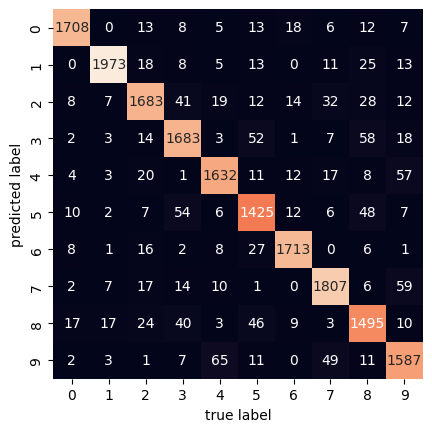

In [ ]:
# Number 5, 6, 7 match data (Use Linear Model) - Percent
# Evaluating the model

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report
classification_rep = classification_report(y_test, y_pred)

# Generate confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred)

accuracy_percentage = accuracy * 100

print(f'Accuracy: {accuracy_percentage:.2f}%')
print('Classification Report:\n', classification_rep)
sns.heatmap(confusion_mtx.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

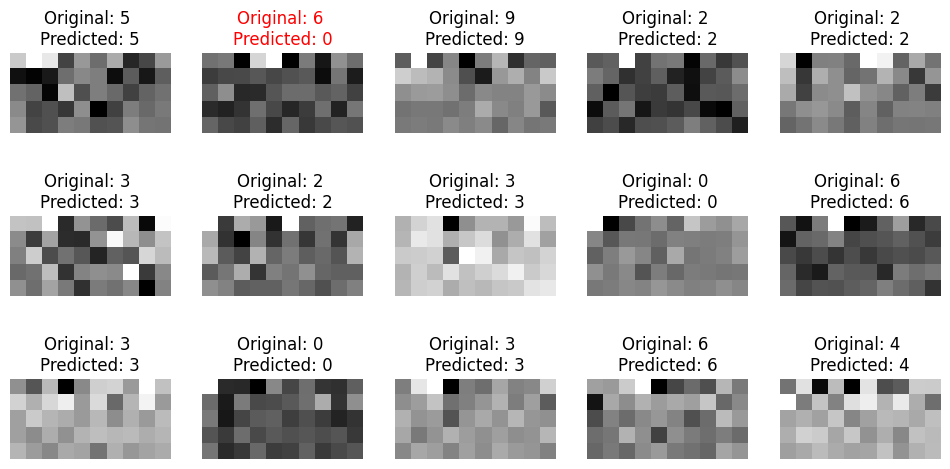

In [20]:
# Number 5, 6, 7 match data (Use Linear Model)

# Visualize a few example predictions
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i].reshape(5, 10), cmap='gray')
    plt.title(f'Original: {y_test[i]} \nPredicted: {y_pred[i]}', color='black' if y_pred[i] == y_test[i] else 'red')
    plt.axis('off')

plt.show()

# **📋📈B. RBF MODEL**

In [21]:
# Number 5, 6, 7 match data (Use RBF Model)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create an SVM model with RBF kernel
rbf_model = SVC(kernel='rbf')

# Fit the SVM model to the training data
rbf_model.fit(X_train, y_train)

# Predict labels on the test data
y_pred = rbf_model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate and print the classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)


Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1770
           1       0.98      0.98      0.98      2043
           2       0.96      0.97      0.96      1848
           3       0.96      0.94      0.95      1824
           4       0.96      0.96      0.96      1737
           5       0.97      0.96      0.96      1661
           6       0.98      0.98      0.98      1746
           7       0.95      0.96      0.96      1835
           8       0.96      0.96      0.96      1777
           9       0.95      0.94      0.95      1759

    accuracy                           0.97     18000
   macro avg       0.97      0.97      0.97     18000
weighted avg       0.97      0.97      0.97     18000

Confusion Matrix:
 [[1741    2    4    1    3    1    4    4    8    2]
 [   0 2012   13    1    8    0    2    4    2    1]
 [   9    5 1788    8    9    4    6   12    7    0]
 [   2    5   20 1721   

Accuracy: 96.53%
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1770
           1       0.98      0.98      0.98      2043
           2       0.96      0.97      0.96      1848
           3       0.96      0.94      0.95      1824
           4       0.96      0.96      0.96      1737
           5       0.97      0.96      0.96      1661
           6       0.98      0.98      0.98      1746
           7       0.95      0.96      0.96      1835
           8       0.96      0.96      0.96      1777
           9       0.95      0.94      0.95      1759

    accuracy                           0.97     18000
   macro avg       0.97      0.97      0.97     18000
weighted avg       0.97      0.97      0.97     18000



Text(113.9222222222222, 0.5, 'predicted label')

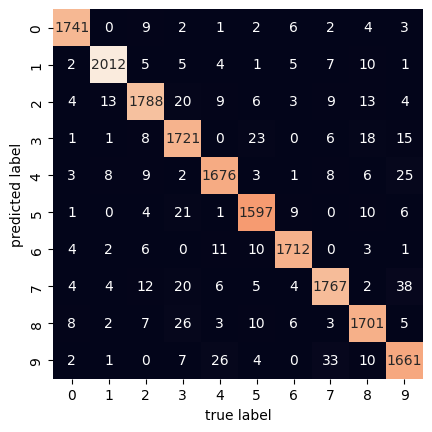

In [22]:
# Number 5, 6, 7 match data (Use RBF Model)
# Evaluate the model

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report
classification_rep = classification_report(y_test, y_pred)

# Generate confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred)

accuracy_percentage = accuracy * 100

print(f'Accuracy: {accuracy_percentage:.2f}%')
print('Classification Report:\n', classification_rep)
sns.heatmap(confusion_mtx.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

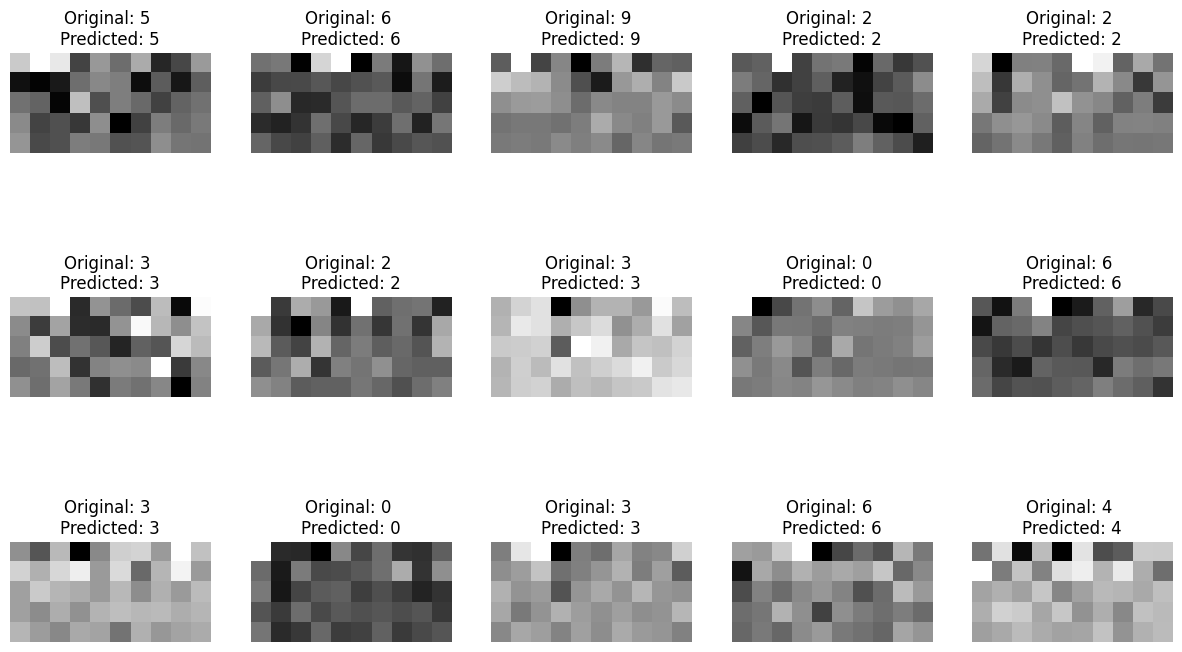

In [23]:
# Number 5, 6, 7 match data (Use RBF Model)
# Visualize a few example predictions

import matplotlib.pyplot as plt

# Assuming you have X_test, y_test, and y_pred defined

plt.figure(figsize=(15, 9))  # Adjust the figure size as needed
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i].reshape(5, 10), cmap='gray')
    plt.title(f'Original: {y_test[i]} \nPredicted: {y_pred[i]}', color='black' if y_pred[i] == y_test[i] else 'red')
    plt.axis('off')

plt.show()

# **📋📈C. SIGMOID MODEL**

In [24]:
# Number 5, 6, 7 match data (Use Sigmoid Model)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sigmoid_model = SVC(kernel='sigmoid', degree=3)

# Fit the SVM model to the training data
sigmoid_model.fit(X_train, y_train)

# Predict labels on the test data
y_pred = sigmoid_model.predict(X_test)

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

Confusion Matrix:
 [[1496    0   50   22   10  120   29    5   31    7]
 [   0 1931   32   21    5   12    2    8   30    2]
 [ 100   55 1363   57   27   19  107   26   50   44]
 [  50   19   66 1419   10   93   25   66   34   42]
 [  29    8   23    4 1403   11   37   45    9  168]
 [ 146   41   28  112   27 1159   22   18   78   30]
 [  98   21   95    5   40   48 1426    2   11    0]
 [  28   27   40   63   26    6    8 1463    9  165]
 [  67   92   47  113   11  124   10   29 1243   41]
 [  24    9    9   28  149   30    1  200   12 1297]]


Accuracy: 78.89%
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.85      0.79      1770
           1       0.88      0.95      0.91      2043
           2       0.78      0.74      0.76      1848
           3       0.77      0.78      0.77      1824
           4       0.82      0.81      0.81      1737
           5       0.71      0.70      0.71      1661
           6       0.86      0.82      0.84      1746
           7       0.79      0.80      0.79      1835
           8       0.82      0.70      0.76      1777
           9       0.72      0.74      0.73      1759

    accuracy                           0.79     18000
   macro avg       0.79      0.79      0.79     18000
weighted avg       0.79      0.79      0.79     18000



Text(113.9222222222222, 0.5, 'predicted label')

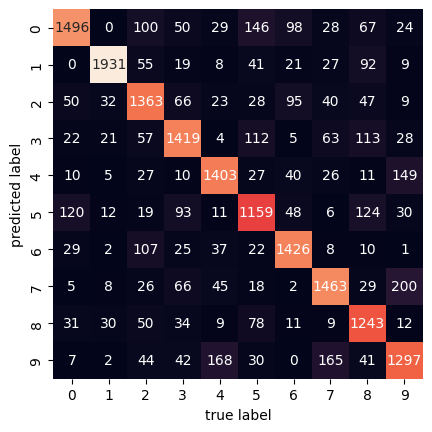

In [25]:
# Evaluate the model
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report
classification_rep = classification_report(y_test, y_pred)

# Generate confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred)

accuracy_percentage = accuracy * 100

print(f'Accuracy: {accuracy_percentage:.2f}%')
print('Classification Report:\n', classification_rep)
sns.heatmap(confusion_mtx.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

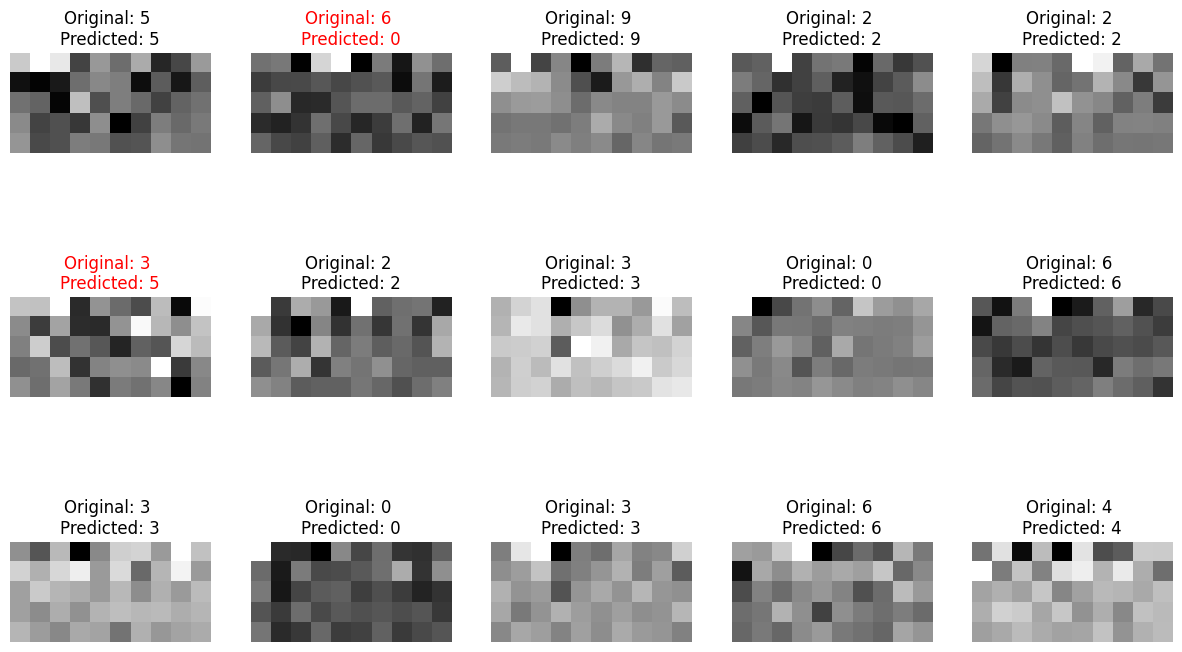

In [26]:
# Number 5, 6, 7 match data (Use Sigmoid Model)
# Visualize a few example predictions
import matplotlib.pyplot as plt

# Assuming you have X_test, y_test, and y_pred defined
plt.figure(figsize=(15, 9))  # Adjust the figure size as needed
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i].reshape(5, 10), cmap='gray')
    plt.title(f'Original: {y_test[i]} \nPredicted: {y_pred[i]}', color='black' if y_pred[i] == y_test[i] else 'red')
    plt.axis('off')

plt.show()


# **📋📈D. POLYNOMIAL KERNEL**

In [27]:
# 5, 6, 7 match data (using polynomial kernel)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

poly_model = SVC(kernel='poly', degree=3)

# Fit the SVM model to the training data
poly_model.fit(X_train, y_train)

# Predict labels on the test data
y_pred = poly_model.predict(X_test)

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

Confusion Matrix:
 [[1718    1    5    1    3   10    5    2   24    1]
 [   0 1999   15    3    8    1    2    2   11    2]
 [   8    4 1777    8   14    2    2    6   26    1]
 [   3    7   11 1708    2   26    0   13   45    9]
 [   2    3    5    0 1674    0    8    1    5   39]
 [   2    0    4   14    7 1601    9    3   17    4]
 [   6    3    1    0    3   12 1702    0   19    0]
 [   4    7   10    5   19    1    0 1746    6   37]
 [   1    6    7   11    8    8    2    6 1722    6]
 [   2    2    1   21   27    6    1   28   12 1659]]


Accuracy: 96.14%
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1770
           1       0.98      0.98      0.98      2043
           2       0.97      0.96      0.96      1848
           3       0.96      0.94      0.95      1824
           4       0.95      0.96      0.96      1737
           5       0.96      0.96      0.96      1661
           6       0.98      0.97      0.98      1746
           7       0.97      0.95      0.96      1835
           8       0.91      0.97      0.94      1777
           9       0.94      0.94      0.94      1759

    accuracy                           0.96     18000
   macro avg       0.96      0.96      0.96     18000
weighted avg       0.96      0.96      0.96     18000



Text(113.9222222222222, 0.5, 'predicted label')

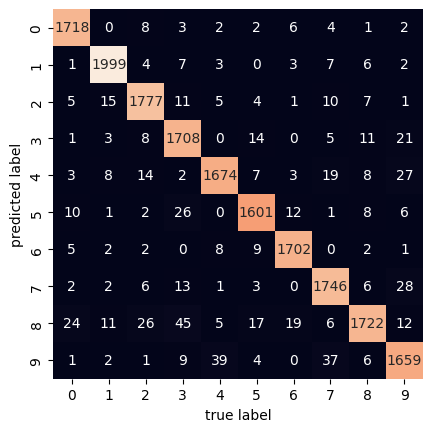

In [28]:
# 5, 6, 7 match data (using polynomial kernel)
# Evaluate the model

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report
classification_rep = classification_report(y_test, y_pred)

# Generate confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred)

accuracy_percentage = accuracy * 100

print(f'Accuracy: {accuracy_percentage:.2f}%')
print('Classification Report:\n', classification_rep)
sns.heatmap(confusion_mtx.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

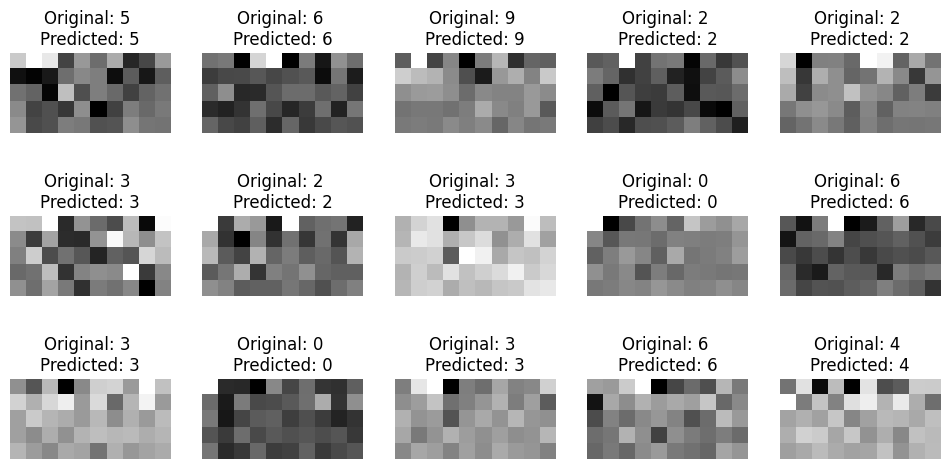

In [29]:
# 5, 6, 7 match data (using polynomial kernel)
# Visualize a few example predictions
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i].reshape(5, 10), cmap='gray')
    plt.title(f'Original: {y_test[i]} \nPredicted: {y_pred[i]}', color='black' if y_pred[i] == y_test[i] else 'red')
    plt.axis('off')

plt.show()

## 📑 8. What is the best model you obtained? What is its configuration? What level of accuracy did you achieve? Explain!

**Answer:**

**- We think from all of the model of svm kernel the highest is RBF kernel because of these reasons :**

The RBF (Radial Basis Function) kernel often outperforms linear, sigmoid, and polynomial kernels in certain cases due to its ability to capture complex and non-linear relationships in the data. A wide range of nonlinear interactions can be modeled using the RBF kernel model, which is widely regarded as the best model for machine learning. It is also rather simple to tune and train.

One hyperparameter, the gamma parameter, determines the construction of an RBF kernel model. The RBF kernel function's width is controlled by the gamma parameter. A narrower kernel function will be produced by a larger gamma value, which can be advantageous when modeling intricate nonlinear interactions. A broader kernel function will be produced by a lower gamma value, which might be advantageous when modeling simpler nonlinear interactions.

The level of accuracy that can be achieved with an RBF kernel model depends on a number of factors, including the quality of the training data, the complexity of the relationship being modeled, and the configuration of the model. However, in general, RBF kernel models tend to achieve higher accuracy than other kernel models, such as linear, sigmoid, and polynomial models.

- **Here are some reasons why the RBF kernel model is generally considered to be better than other kernel models:**

The RBF kernel is a universal kernel, meaning that it can approximate any function to any degree of accuracy.
- The RBF kernel is relatively easy to train and tune.
- The RBF kernel is robust to noise and outliers in the training data.
- The RBF kernel has been shown to be effective on a wide variety of machine learning tasks, including classification, regression, and clustering.

In addition to the above reasons, the RBF kernel model is also generally considered to be better than linear, sigmoid, and polynomial models because it is more flexible and can model a wider variety of nonlinear relationships.

Linear models can only model linear relationships, while sigmoid and polynomial models can only model a limited set of nonlinear relationships. The RBF kernel model, on the other hand, can model a wide variety of nonlinear relationships, including complex and non-smooth relationships.

This flexibility makes the RBF kernel model a good choice for machine learning tasks where the relationship between the input and output variables is unknown or complex.


